# Diabetes Prediction using Decision Tree



## 1. Loading the dataset.
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [227]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [228]:
df.shape

(100000, 9)

## 2&3 Data Pre-processing and Exploratory Data Analysis 

### Handling Missing Values

In [229]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Handling Outliers

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


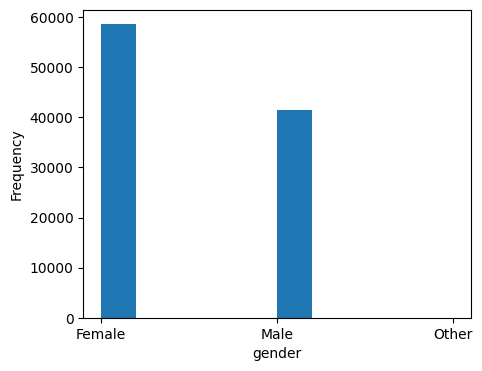

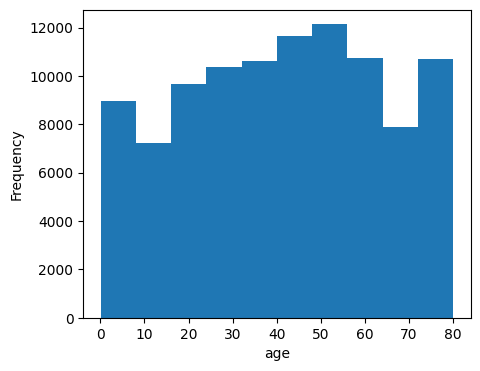

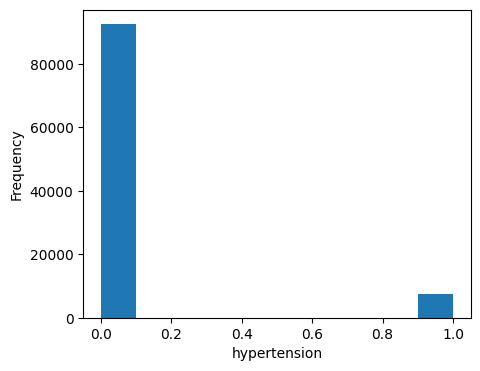

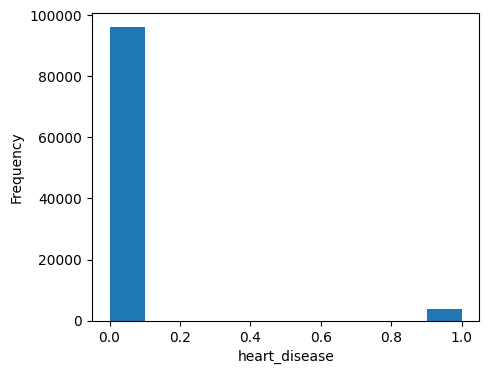

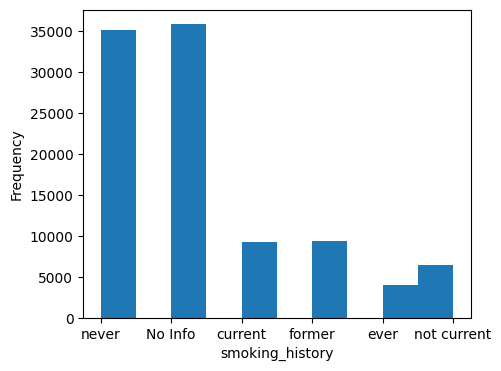

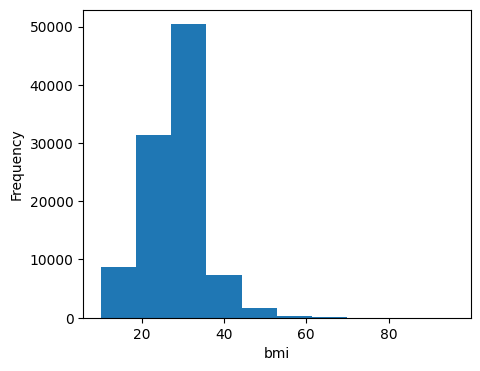

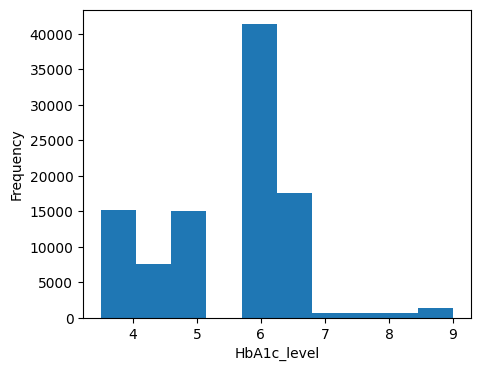

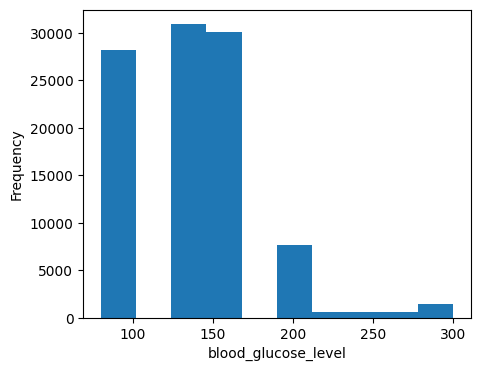

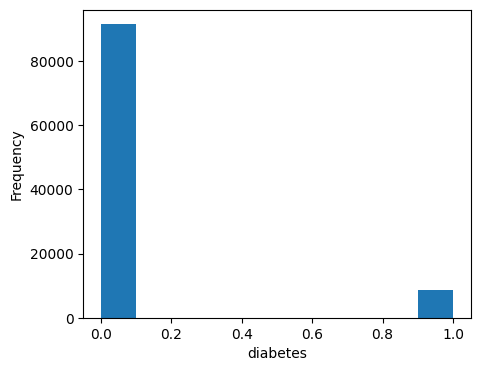

In [230]:
print(df.columns)
for i in df.columns:
    plt.figure(figsize=(5,4))
    plt.hist(df[i]) 
    plt.xlabel(i)
    plt.ylabel("Frequency") 
    plt.show()

### Encoding 

In [231]:
unique_groups = df['smoking_history'].unique()
print(unique_groups)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df['gender'] = le.fit_transform(df['gender'])


In [233]:
unique_groups = df['smoking_history'].unique()
print(unique_groups)


[4 0 1 3 2 5]


### Normalization and Standardization

In [234]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# min_max_scaler = MinMaxScaler()

# X_normalized = min_max_scaler.fit_transform(df['HbA1c_level'])

# standard_scaler = StandardScaler()

# X_standardized = standard_scaler.fit_transform(df['blood_glucose_level'])

# df['HbA1c_level'] = X_normalized[:, 0]

# df['blood_glucose_level'] = X_standardized[:, 1]


In [235]:
# plt.hist(df['HbA1c_level'])
# plt.show()

In [236]:
# plt.hist(df['blood_glucose_level'])
# plt.show()

## 4 Feature Engineering

In [237]:
feature = df[list(df.columns[:-1])]
feature.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [238]:
target = df[df.columns[-1]]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [239]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best_selector = SelectKBest(score_func=f_classif, k=4)
k_best_selector

SelectKBest(k=4)

In [240]:
k_best_selector.fit(feature, target)

X_selected = k_best_selector.transform(feature)

print("Selected Features:", X_selected.shape[1]) 

Selected Features: 4


In [241]:
selected_indices = k_best_selector.get_support(indices=True)
print("Indices of Selected Features:", selected_indices)
for i in selected_indices:
    print(df.columns[i])

Indices of Selected Features: [1 5 6 7]
age
bmi
HbA1c_level
blood_glucose_level


## 5. Split the data into training, testing and validation sets.

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=42)

## 6. Model Selection.

In [243]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

## 7. Train the Model

In [244]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 8. Measure the performance of the trained model.

In [245]:
from sklearn.metrics import accuracy_score

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 97.06%
